# Running the ICML 2018 Experiments

In this series of notebooks, we will replicate and analyze the ICML 2018 experiments that were used for benchmarking in <a href="http://proceedings.mlr.press/v80/falkner18a.html" target="_blank">BOHB (Falkner et al. 2018)</a>.
In addition to <a href="https://github.com/automl/HpBandSter" target="_blank">HpBandSter</a>, we will use <a href="https://github.com/automl/CAVE" target="_blank">CAVE</a> to analyze and visualize the optimization process.

## About this experiment

### Bayesian Neural Networks (BNN)

"For this experiment we optimize the hyperparameters and
the architecture of a two-layer fully connected Bayesian
neural network trained with Markov Chain Monte-Carlo
(MCMC) sampling. We use stochastic gradient Hamiltonian Monte-Carlo sampling (SGHMC) (Chen et al., 2014)
with scale adaption (Springenberg et al., 2016) to sample
the parameter vector of the network." (Falkner et al., 2018)

### Installation requirements

To run the experiments, please install the <a href="https://github.com/automl/BOHBsCAVE/blob/master/examples/icml_2018_experiments/requirements.txt" target="_blank">requirements</a>, e.g. `pip install -r examples/icml_2018_experiments/requirements.txt`.

## Run the experiment


This examples ships with all the code necessary to reproduce the experiment. Because it takes a few days to generate the data, the results of the optimization are provided in `examples/icml_2018_experiments/opt_results/` If you want to generate the data (from examples/icml_2018_experiments), just run:

In [ ]:
%%capture
! python run_experiment.py --exp_name bnn --num_iterations 4 --min_budget 300 --max_budget 1000 --n_workers 1

You can use this script to generate the optimization data for a variety of optimizers, the results will (by default) be stored in `examples/icml_2018_experiments/EXPERIMENT[/DATASET]/OPTIMIZER`. Use `python run_experiment --help` to see how to use the script.
If you have access to a cluster, take a look at the scripts provided for cluster computation on a SLURM cluster at `examples/icml_2018_experiments/scripts/cluster/`.

## Using the results in CAVE

### Instantiate CAVE

Analyzing the optimization results with CAVE is very straight-forward. If you want to use CAVE interactively in a notebook, set `show_jupyter=True`. Specify which optimization you want to analyze via the `folders` argument and specify `file_format==SMAC3` or `file_format==BOHB`, depending on which optimizer was used for the results. To analyze how BOHB optimized the bnn-problem for the bostonhousing dataset, run:

In [1]:
from cave.cavefacade import CAVE

cave = CAVE(folders=["opt_results/bnn/bostonhousing/bohb"],  # .../bnn/DATASET/OPTIMIZER
            output_dir="CAVE_reports/bnn_notebook",          # output for debug/images/etc
            ta_exec_dir=["."],                               # Only important for SMAC-results
            file_format='BOHB',                              # BOHB or SMAC3
            verbose_level='OFF',
            show_jupyter=True,
           )

To generate the HTML-report you can use the `analyze`-method. The report is located in `output_dir/report.html`, so in this case in `CAVE_reports/bnn_notebook/report.html`.

In [ ]:
%%capture
cave.analyze()
! firefox CAVE_reports/bnn_notebook/report.html

CAVE is fully compatible with Jupyter notebooks. You can invoke the individual analysis methods.

The most interesting plot for BOHB might be a visualization of the learning curves:

In [2]:
cave.bohb_learning_curves();

Loading BokehJS ...

In [3]:
cave.overview_table();

For each budget, we can list the cost over incumbents:

In [4]:
cave.bohb_incumbents_per_budget();

,budget 370.4,budget 1111.1,budget 3333.3,budget 10000
burn_in,0.389664,0.0537928,0.0537928,0.0537928
l_rate,0.0297414,0.0695345,0.0695345,0.0695345
mdecay,0.328801,0.586302,0.586302,0.586302
n_units_1,67,228,228,228
n_units_2,184,24,24,24
Cost,39.162,5.413,5.851,4.992


For parameter-importance analysis, CAVE uses <a href="https://github.com/automl/ParameterImportance" target="_blank">PIMP</a> , a package that provides multiple approaches to parameter-importance analysis. We can easily invoke them via CAVE, of course. To estimate the importance, random forests are used to predict performances of configurations that were not executed. This is difficult for big budgets with few configurations.

We can access the individual budgets via the 'run'-keyword-argument of each analysis-method.

In [5]:
cave.cave_fanova(run='budget_10000');

-------------------- Single importance: --------------------,--------------------
l_rate,55.0564 +/- 48.4423
burn_in,25.1285 +/- 43.2251
n_units_2,7.1518 +/- 23.2925
mdecay,5.9193 +/- 22.8423
n_units_1,0.5223 +/- 2.0056
-------------------- Pairwise importance: --------------------,--------------------
n_units_2 & n_units_1,5.2898 +/- 20.4804
l_rate & n_units_2,0.5975 +/- 1.64
l_rate & mdecay,0.2745 +/- 1.003
burn_in & n_units_2,0.0548 +/- 0.2121


In [6]:
cave.local_parameter_importance(run='budget_10000');

For each budget, we can compare the different parameter-importance-methods that have already been run:

In [7]:
cave.pimp_comparison_table(run='budget_10000');

Loading BokehJS ...

To analyze BOHB's behaviour, we can check out the configurator footprint, cost-over-time and parallel coordinated parameters:

In [8]:
cave.configurator_footprint(use_timeslider=True, num_quantiles=5);

Loading BokehJS ...

In [2]:
cave.cost_over_time();

NameError: name 'cave' is not defined

/home/shuki/Repos/BOHBsCAVE/.ve_BOHBsCAVE/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


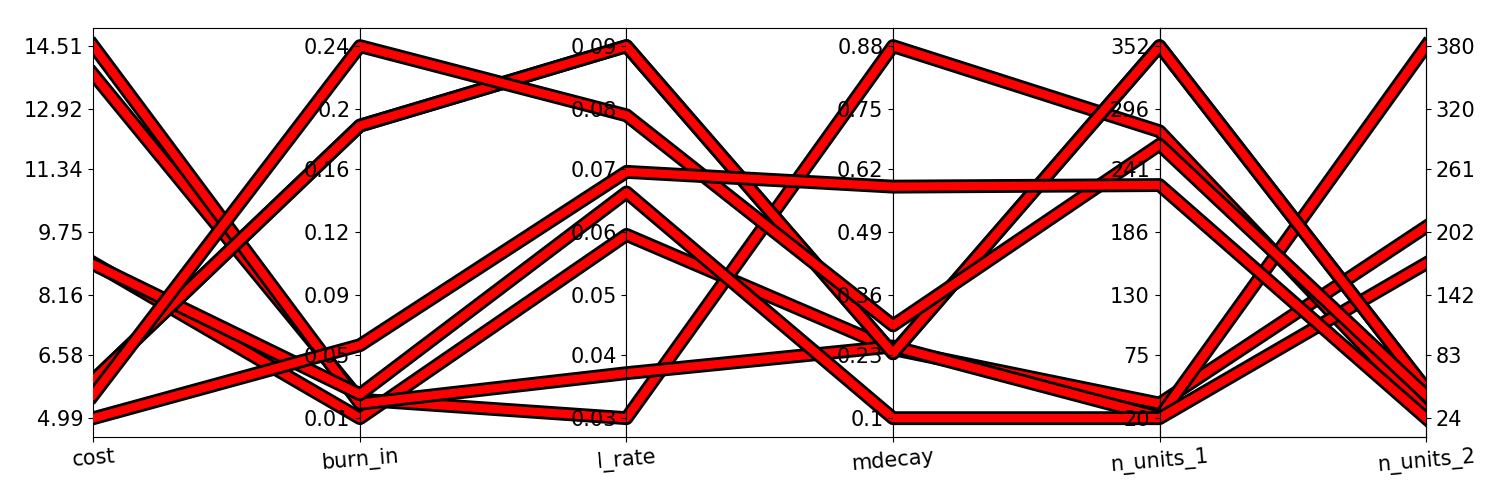

In [40]:
cave.parallel_coordinates(run='budget_10000');